# SciKit-Learn - Model Selection

- This lecture is all about how to train, evaluate and optimize your models with good methodology.
- We'll look into how to create a train set and a test set with a train test split.
- We'll also look into how to validate your model with cross validation.

### Trainset / Testset

- In machine learning, you never want to evaluate the performance of your model with the same data that you used to train your model.
- You want your sets to be different because otherwise we're feeding in information that the model has already seen.
- A common split is 80% for training, and 20% for testing, but others exist.
    - Train data:
        - model.fit(X{train}, y{train})
    - Test data:
        - model.score(X{test}, y{test})
- We have functions to help us do this already in the scikit-learn library.
    - In the module sklearn.model_selection we find many functions that allow us to prepare our data set for our X and y variables.
- train_test_split is a function in this module that helps us easily divide up our data.
- First we're going to import our data..

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)

(150, 4)


- Now we import our train_test_split method from the model_selection module to help us divide up our data.
- The test_size argument tells the train_test_split function what the percentage division should be for the data.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


- We can take a look at our sets by just plotting them.
- Something to note about how the split is performed: all the data is mixed before the split so the split is as random as posible; for this reason, each time the train_test_split is called the division of the data will look a little bit different.
- If you want to provide your own seed so that you can get the same division as another time in the past, you can define the "random_state" keyword argument.
    - This acts the same as a seed in the rand function.

Text(0.5, 1.0, 'Test set')

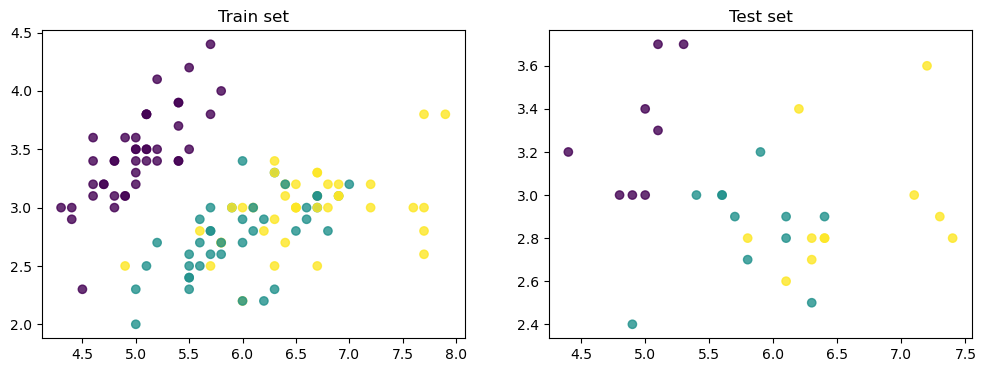

In [6]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title('Test set')

- Next we use our train data with the fit method to train our model.
- Then we'll score it and see our score (coefficient of determination).

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 1.0
Test score: 0.9


- We get a coefficient of determination of 1 which means that our test data fits in our training data perfectly well.
- However, this doesn't necessarily mean that the model is perfect and will predict the correct outcome 100% of the time.
- If we test it with data that it has never seen before (like the test_set data), we see that the coefficient to determination is lower.


### Validation Set - Improving the Model

- Normally the job of the Data Scientist is to improve the score of these models.
- We're looking for 0.95 to 0.98 as a good fit number.
- To achieve this, we need to adjust the hyperparameters of our model.
- Below, we can change the number of neighbors for our knn model to make it closer to 1.

In [10]:
model = KNeighborsClassifier(n_neighbors=6)

model.fit(X_train, y_train)
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 0.9833333333333333
Test score: 0.9666666666666667


- The pitfall from constantly tweeking the hyperparameters to get closer to 100% however is that if we continually approch 100% we're really just finding the right parameters to fit this particular test set. This can lead to less generalizability later on.
- To combat this, we need to use mutliple test sets.
- At this point we can introduce the validation set.
    - We use the train set to train the data.
    - Then we use the validation set to adjust the hyperparameters to get as close to 1 as possible.
    - Then we use the test set to actually test the adjusted model.
- The obvious question then is, how do we find the best settings for our model to find the right balance of coefficient of determination and generalizability?
- We use a method called cross validation.

### Cross Validation

-  Rather than having 1 validation set, 1 larger train set, and 1 test set, we instead cut the train set into smaller pieces and run our model multiple times where each section gets its turn to act as a validation set.
- Read more here on the scikitlearn site: {{https://scikit-learn.org/stable/modules/cross_validation.html}}
- In this particular example, we're going to look at the K fold.

In [11]:
from sklearn.model_selection import cross_val_score

- Here we are going to use the cross_val_score to automatically divide our data set into pieces, and run them through the model.
- cross_val_score(model, X, y, cv=#, scoring='option')
    - model
        - This is where we enter which training model we want to use.
    - X
        - This is our X (input) data.
    - y
        - This is our y (output) data.
    - cv=#
        - Here we can change how many times we split our data for cross validation.
    - scoring='option'
        - Here we can tell the cross_val_score which metric we want to use for our scoring metric.
- As a return value, we get an ndarray with a score with the number of splits we made.

In [14]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy')

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

- We can take the mean of these numbers to get a general idea of how our parameter did with our model.
- The default knn k value is 5, so this mean is based on looking at the 5 nearest neighbors and finding a score.

In [15]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9833333333333334

- Now we can run a loop where we look at different k values to see which results in the best score results.

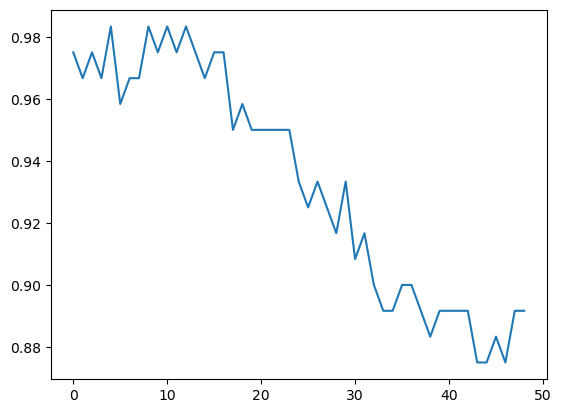

In [16]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)

plt.plot(val_score)

- Here we can see that as k gets above about 11 or 12 we start to lose accuracy with our model.

### Validation Curve

- Above, we found how to analyze a single hyperparameter and plot the results to find a good setting for this parameter.
- We did this using a for loop and ploting the results.
- Another method for doing this exists called the validation curve.

In [20]:
from sklearn.model_selection import validation_curve

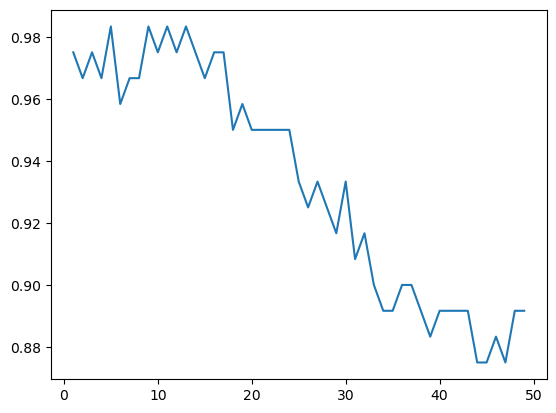

In [24]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1))

- As you can see, we get the exact same graph as before since this validatino curve does exactly what our for loop did.
- However, with the validation_curve function, we also get train_score data which we can graph as well.

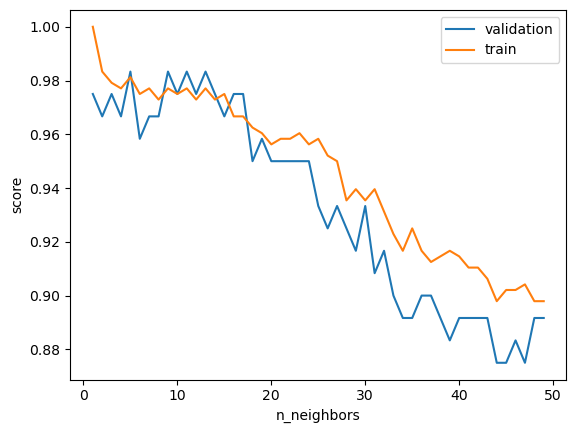

In [26]:
plt.plot(k, val_score.mean(axis=1), label="validation")
plt.plot(k, train_score.mean(axis=1), label="train")

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

- A graph like this is very useful for detecting "Over Fitting".
    - Further reading: {{https://elitedatascience.com/overfitting-in-machine-learning}}
- In summary, we can "overfit" our data if we make our model include every edge case in our data.
- This leads to less generalizability.

- Specifically looking at KNN, there are other hyperparameters that we can adjust other than the number of neighbors.
- We can also adjust how we determine the distance (euclidean vs manhattan).
- There are other that exist as well..
- If we want to test all the hyperparameters and their results to find the best fit we can use Grid Search CV.

### GridSearchCV

- This lets us do cross validation of our hyperparameters on top of our cross validation of our parameter values.
- If before we were doing a 1 dimensional cross validation with number of neighbors, now were doing a 2 dimensional cross validation where we are validating each value of n_neighbors with each way of measuring (euclidean, manhattan, minkowski).

In [38]:
from sklearn.model_selection import GridSearchCV

- First step is to create a dictionary with the different hyperparameters to adjust.

In [39]:
param_grid = {'n_neighbors': np.arange(1, 20), 'metric': ['euclidean', 'manhattan']}

- Now in the GridSearchCV function we pass our model, our dictionary of options we want to change, and cv which is how many pieces we split our data into for validation.

In [40]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
print(type(grid))

<class 'sklearn.model_selection._search.GridSearchCV'>


- This gives us a GridSearchCV object which we can then use with the fit method for our data.
- Here is where we give our data.

In [41]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

- Once the training is finished, we can view which settings gave us the best results.

In [42]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_index_)
print(grid.best_estimator_)
print(type(grid.best_estimator_))

0.9833333333333334
{'metric': 'euclidean', 'n_neighbors': 5}
4
KNeighborsClassifier(metric='euclidean')
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


- The best_estimator_ attribute is an object that would be the best to use for your model based on the grid search.
- We can save this directly as an object and use it.

In [43]:
model = grid.best_estimator_

In [44]:
model.score(X_test, y_test)

0.9333333333333333

- Now we can use a confusion matrix to evaluate the quality of a classificatino model such as knn.
- A confusion matrix can be very useful in showing us where are the errors in our models.
- For more on displaying confusion matrixes, check out the scikitlearn page on it: {{https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html}}

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

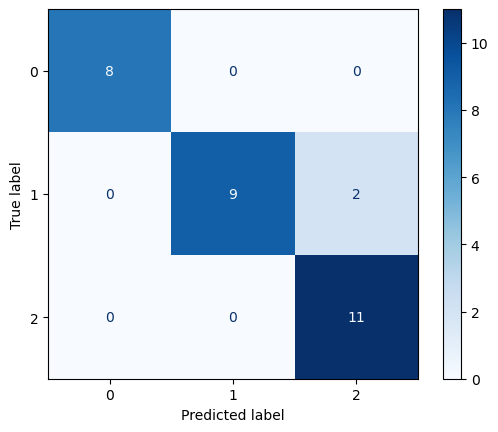

In [63]:
cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')

### Learning Curve

- Essencially, with the learning curve we want to see, if we give our model more data, will it perform better?
- Most of the time, the performance of our model follows the law of dimishing returns and ends up reaching a plateau.
- At this point, it's usually better to move on to other projects, save money, etc.
- To view our learning curve for our model, there are built in functions in scikitlearn to help us.

In [65]:
from sklearn.model_selection import learning_curve

- Here we are going to divide our training sizes up into 5 segments. 20% of our data, 40% of our data, etc to 100%.
- Calling the learning curve function returns for us 3 values.
    - N
        - The number of samples used in this particular run with the mode.
    - train_score
        - The coefficient of determination for that data set against training data.
    - val_score
        - The coefficient of determination for that data set against validation data.

[ 9 19 28 38 48 57 67 76 86 96]


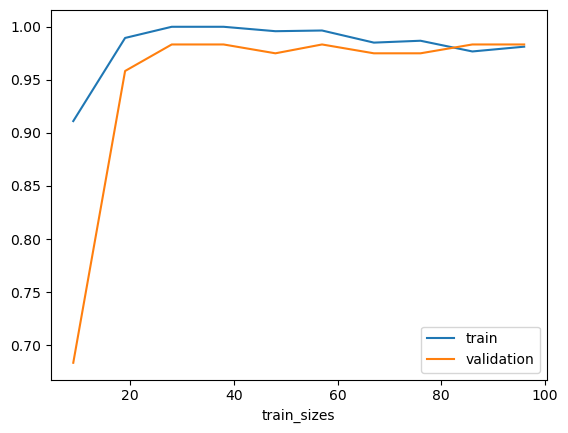

In [69]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10) , cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

- Here we can see that after a certain point, there isn't really better performance with the model even though we're giving it more and more data.
- This is very useful in real-world applications because aquiring data is expensive and we can plan and use our time more effectively with this information.